In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statistics

In [180]:
df = pd.read_csv('data/wine_cleared.zip')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               129971 non-null  object 
 8   taster_name            129971 non-null  object 
 9   taster_twitter_handle  129971 non-null  object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 12.9+ MB


In [181]:
df['price_round'] = df['price'].round().astype(int)

In [182]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65


In [183]:
import re

In [184]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
df['year'] = df['title'].str.findall(regex).str.get(0)
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012


In [185]:
df['is_usa'] = df['country'].apply(lambda x: 1 if x == 'US' else 0)

In [186]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013,0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013,1
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012,1


In [187]:
#df_no_usa = df[df['is_usa'] == 0]
#df_no_france = df[df_no_usa['country'] != 'France']

In [188]:
df['country'].value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

In [189]:
df['is_france'] = df['country'].apply(lambda x: 1 if x == 'France' else 0)
df['is_italy'] = df['country'].apply(lambda x: 1 if x == 'Italy' else 0)


In [190]:
df[df['is_italy'] == 1]

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013,0,0,1
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.000000,Sicily & Sardinia,Vittoria,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,16,2013,0,0,1
13,13,Italy,This is dominated by oak and oak-driven aromas...,Rosso,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascalese,Masseria Setteporte,35,2012,0,0,1
22,22,Italy,Delicate aromas recall white flower and citrus...,Ficiligno,87,19.000000,Sicily & Sardinia,Sicilia,Kerin O’Keefe,@kerinokeefe,Baglio di Pianetto 2007 Ficiligno White (Sicilia),White Blend,Baglio di Pianetto,19,2007,0,0,1
24,24,Italy,"Aromas of prune, blackcurrant, toast and oak c...",Aynat,87,35.000000,Sicily & Sardinia,Sicilia,Kerin O’Keefe,@kerinokeefe,Canicattì 2009 Aynat Nero d'Avola (Sicilia),Nero d'Avola,Canicattì,35,2009,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129929,129929,Italy,"This luminous sparkler has a sweet, fruit-forw...",unknown,91,38.000000,Veneto,Prosecco Superiore di Cartizze,unknown,unknown,Col Vetoraz Spumanti NV Prosecco Superiore di...,Prosecco,Col Vetoraz Spumanti,38,NaN,0,0,1
129943,129943,Italy,"A blend of Nero d'Avola and Syrah, this convey...",Adènzia,90,29.000000,Sicily & Sardinia,Sicilia,Kerin O’Keefe,@kerinokeefe,Baglio del Cristo di Campobello 2012 Adènzia R...,Red Blend,Baglio del Cristo di Campobello,29,2012,0,0,1
129947,129947,Italy,"A blend of 65% Cabernet Sauvignon, 30% Merlot ...",Symposio,90,20.000000,Sicily & Sardinia,Terre Siciliane,Kerin O’Keefe,@kerinokeefe,Feudo Principi di Butera 2012 Symposio Red (Te...,Red Blend,Feudo Principi di Butera,20,2012,0,0,1
129961,129961,Italy,"Intense aromas of wild cherry, baking spice, t...",unknown,90,30.000000,Sicily & Sardinia,Sicilia,Kerin O’Keefe,@kerinokeefe,COS 2013 Frappato (Sicilia),Frappato,COS,30,2013,0,0,1


In [191]:
df[df['is_france'] == 1]

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy
7,7,France,This dry and restrained wine offers spice in p...,unknown,87,24.000000,Alsace,Alsace,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,24,2012,0,1,0
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.000000,Alsace,Alsace,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,27,2012,0,1,0
11,11,France,"This is a dry wine, very spicy, with a tight, ...",unknown,87,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Leon Beyer 2012 Gewurztraminer (Alsace),Gewürztraminer,Leon Beyer,30,2012,0,1,0
30,30,France,Red cherry fruit comes laced with light tannin...,Nouveau,86,35.363389,Beaujolais,Beaujolais-Villages,Roger Voss,@vossroger,Domaine de la Madone 2012 Nouveau (Beaujolais...,Gamay,Domaine de la Madone,35,2012,0,1,0
42,42,France,"This is a festive wine, with soft, ripe fruit ...",Nouveau,86,9.000000,Beaujolais,Beaujolais,Roger Voss,@vossroger,Henry Fessy 2012 Nouveau (Beaujolais),Gamay,Henry Fessy,9,2012,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129964,129964,France,"Initially quite muted, this wine slowly develo...",Domaine Saint-Rémy Herrenweg,90,35.363389,Alsace,Alsace,Roger Voss,@vossroger,Domaine Ehrhart 2013 Domaine Saint-Rémy Herren...,Gewürztraminer,Domaine Ehrhart,35,2013,0,1,0
129965,129965,France,"While it's rich, this beautiful dry wine also ...",Seppi Landmann Vallée Noble,90,28.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann,28,2013,0,1,0
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,30,2013,0,1,0
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,32,2012,0,1,0


In [192]:
df['is_france'].sum()

22093

In [193]:
df['is_italy'].sum()

19540

In [194]:
df['year'] = pd.to_datetime(df['year'], errors='coerce')

In [195]:
df['old_wine'] = df['year'].apply(lambda x: 1 if x.year < 2010 else 0)

In [196]:
df['old_wine'].sum()

39765

In [197]:
df['locality'] = df['title'].str.findall('\(([\w\s]+)\)').str.get(0)
df['locality']

0                        Etna
1                       Douro
2           Willamette Valley
3         Lake Michigan Shore
4           Willamette Valley
                 ...         
129966                  Mosel
129967                 Oregon
129968                 Alsace
129969                 Alsace
129970                 Alsace
Name: locality, Length: 129971, dtype: object

In [198]:
country_population = pd.read_csv('data/country_population.zip', sep=';')
country_population[country_population['country']=='Italy']

,country,population
24,Italy,"59,097,904"


In [199]:
country_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     241 non-null    object
 1   population  241 non-null    object
dtypes: object(2)
memory usage: 3.9+ KB


In [200]:
df = df.join(country_population.set_index('country'), on='country')

In [201]:
country_area = pd.read_csv('data/country_area.zip', sep=';')
country_area

,country,area
0,Russia,17075400.00
1,Canada,9984670.00
2,China,9596960.00
3,US,9372610.00
4,Brazil,8547000.00
...,...,...
188,San Marino,61.00
189,Tuvalu,26.00
190,Nauru,21.00
191,Monaco,2.00


In [202]:
df = df.join(country_area.set_index('country'), on='country')
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,Nicosia,35,2013-01-01,0,0,1,0,Etna,"59,097,904",301230.0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,Douro,"10,347,892",92391.0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Rainstorm,14,2013-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,St. Julian,13,2013-01-01,1,0,0,0,Lake Michigan Shore,"333,022,386",9372610.0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Sweet Cheeks,65,2012-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013-01-01,0,0,0,0,Mosel,"83,129,285",357022.0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,Citation,75,2004-01-01,1,0,0,1,Oregon,"333,022,386",9372610.0
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,Domaine Gresser,30,2013-01-01,0,1,0,0,Alsace,"68,035,000",547030.0
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,Domaine Marcel Deiss,32,2012-01-01,0,1,0,0,Alsace,"68,035,000",547030.0


In [203]:
df[df['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))']

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area
94,94,US,"Barrel notes are prominent, with aromas of Cre...",Grand Klasse Reserve Lawrence Vineyards,88,22.0,Washington,Columbia Valley (WA),Sean P. Sullivan,@wawinereport,...,Gård,22,2014-01-01,1,0,0,0,WA,"333,022,386",9372610.0


In [204]:
# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls

,client_id,agent_date,created_at,end_date
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32


In [205]:
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls

,client_id,agent_date,created_at,end_date,duration
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6


In [206]:
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
calls

,client_id,agent_date,created_at,end_date,duration,time_connection
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1,5
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231,2
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104,0
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2,7
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215,1
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95,5
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92,2
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215,0
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94,1
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6,66


In [207]:
calls['time_connection'].sum()

89

In [208]:
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x > 10 else 0)
calls

,client_id,agent_date,created_at,end_date,duration,time_connection,is_connection
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1,5,0
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231,2,1
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104,0,1
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2,7,0
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215,1,1
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95,5,1
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92,2,1
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215,0,1
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94,1,1
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6,66,0


In [209]:
calls['is_connection'].sum()

7

In [210]:
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds
calls

,client_id,agent_date,created_at,end_date,duration,time_connection,is_connection,time_diff
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1,5,0,6
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231,2,1,233
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104,0,1,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2,7,0,9
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215,1,1,216
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95,5,1,100
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92,2,1,94
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215,0,1,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94,1,1,95
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6,66,0,72


In [211]:
calls['time_diff'].sum()

1144

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             129972 non-null  int64         
 1   country                129909 non-null  object        
 2   description            129972 non-null  object        
 3   designation            129972 non-null  object        
 4   points                 129972 non-null  int64         
 5   price                  129972 non-null  float64       
 6   province               129909 non-null  object        
 7   region_1               129972 non-null  object        
 8   taster_name            129972 non-null  object        
 9   taster_twitter_handle  129972 non-null  object        
 10  title                  129972 non-null  object        
 11  variety                129971 non-null  object        
 12  winery                 129972 non-null  obje

In [213]:
df['year'] = pd.to_datetime(df['year'])
df['years_diff'] = (pd.to_datetime("2022-01-12") - df['year']).dt.days
df['years_diff'].max()

98627.0

In [214]:
import category_encoders as ce

In [215]:
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

In [216]:
clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


In [217]:
ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(clothing[['size', 'type']])
clothing = pd.concat([clothing, data_bin], axis=1)

clothing

,size,type,size,type
0,xxs,dress,1,1
1,xxs,skirt,1,2
2,xs,dress,2,1
3,s,skirt,3,2
4,m,dress,4,1
5,l,shirt,5,3
6,s,coat,3,4
7,m,coat,4,4
8,xxl,shirt,6,3
9,l,dress,5,1


In [218]:
ord_encoder = ce.OrdinalEncoder(cols=['year'])
ord_encoder.fit(df['year'].sort_values())
df['year_encoded'] = ord_encoder.transform(df['year'])

df

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,year,is_usa,is_france,is_italy,old_wine,locality,population,area,years_diff,year_encoded
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,2013-01-01,0,0,1,0,Etna,"59,097,904",301230.0,3298.0,77
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,2011-01-01,0,0,0,0,Douro,"10,347,892",92391.0,4029.0,75
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,2013-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0,3298.0,77
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,2013-01-01,1,0,0,0,Lake Michigan Shore,"333,022,386",9372610.0,3298.0,77
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,2012-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0,3664.0,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,2013-01-01,0,0,0,0,Mosel,"83,129,285",357022.0,3298.0,77
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,2004-01-01,1,0,0,1,Oregon,"333,022,386",9372610.0,6586.0,68
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,2013-01-01,0,1,0,0,Alsace,"68,035,000",547030.0,3298.0,77
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,2012-01-01,0,1,0,0,Alsace,"68,035,000",547030.0,3664.0,76


In [219]:
import category_encoders as ce

clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])

ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(clothing[['size', ]])
clothing = pd.concat([clothing, data_bin], axis=1)

dummy_encoder = ce.OneHotEncoder(cols=['type',], use_cat_names=True)
data_bin = dummy_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, data_bin], axis=1)

bin_encoder = ce.BinaryEncoder(cols=['type',])
data_bin = bin_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, data_bin], axis=1)

clothing

,size,type,size,type_dress,type_skirt,type_shirt,type_coat,type_0,type_1,type_2
0,xxs,dress,1,1,0,0,0,0,0,1
1,xxs,skirt,1,0,1,0,0,0,1,0
2,xs,dress,2,1,0,0,0,0,0,1
3,s,skirt,3,0,1,0,0,0,1,0
4,m,dress,4,1,0,0,0,0,0,1
5,l,shirt,5,0,0,1,0,0,1,1
6,s,coat,3,0,0,0,1,1,0,0
7,m,coat,4,0,0,0,1,1,0,0
8,xxl,shirt,6,0,0,1,0,0,1,1
9,l,dress,5,1,0,0,0,0,0,1


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             129972 non-null  int64         
 1   country                129909 non-null  object        
 2   description            129972 non-null  object        
 3   designation            129972 non-null  object        
 4   points                 129972 non-null  int64         
 5   price                  129972 non-null  float64       
 6   province               129909 non-null  object        
 7   region_1               129972 non-null  object        
 8   taster_name            129972 non-null  object        
 9   taster_twitter_handle  129972 non-null  object        
 10  title                  129972 non-null  object        
 11  variety                129971 non-null  object        
 12  winery                 129972 non-null  obje

In [221]:
dummy_encoder = ce.OneHotEncoder(cols=['taster_name',], use_cat_names=True)
data_bin = dummy_encoder.fit_transform(df['taster_name'])
df = pd.concat([df, data_bin], axis=1)

df

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,taster_name_Jim Gordon,taster_name_Joe Czerwinski,taster_name_Anne Krebiehl MW,taster_name_Lauren Buzzeo,taster_name_Mike DeSimone,taster_name_Jeff Jenssen,taster_name_Susan Kostrzewa,taster_name_Carrie Dykes,taster_name_Fiona Adams,taster_name_Christina Pickard
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,0,0,0,0,0,0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,0,0,0,0,0,0,0,0,0,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,0,0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,0,0,0,0,0,0,0,0,0,0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,0,0,0,0,0,0,0,0,0,0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,0,0
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,0,0,0,0,0,0,0,0,0,0
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,0,0,0,0,0,0,0,0,0,0


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unnamed: 0                      129972 non-null  int64         
 1   country                         129909 non-null  object        
 2   description                     129972 non-null  object        
 3   designation                     129972 non-null  object        
 4   points                          129972 non-null  int64         
 5   price                           129972 non-null  float64       
 6   province                        129909 non-null  object        
 7   region_1                        129972 non-null  object        
 8   taster_name                     129972 non-null  object        
 9   taster_twitter_handle           129972 non-null  object        
 10  title                           129972 non-null  object 

In [223]:
bin_encoder = ce.BinaryEncoder(cols=['country',])
data_bin = bin_encoder.fit_transform(df['country'])
df = pd.concat([df, data_bin], axis=1)

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 50 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unnamed: 0                      129972 non-null  int64         
 1   country                         129909 non-null  object        
 2   description                     129972 non-null  object        
 3   designation                     129972 non-null  object        
 4   points                          129972 non-null  int64         
 5   price                           129972 non-null  float64       
 6   province                        129909 non-null  object        
 7   region_1                        129972 non-null  object        
 8   taster_name                     129972 non-null  object        
 9   taster_twitter_handle           129972 non-null  object        
 10  title                           129972 non-null  object 

In [225]:
df['taster_twitter_handle'].nunique()

16

In [226]:
list_of_dicts = [
    {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
    {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
    {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
dff = pd.DataFrame(list_of_dicts)

In [227]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,taster_name_Susan Kostrzewa,taster_name_Carrie Dykes,taster_name_Fiona Adams,taster_name_Christina Pickard,country_0,country_1,country_2,country_3,country_4,country_5
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,0,0,0,0,0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,0,0,0,0,0,0,0,0,1,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,1,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,0,0,0,0,0,0,0,0,1,1
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,0,0,0,0,0,0,0,1,1,0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,1,1
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,0,0,0,0,0,0,0,1,0,1
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,0,0,0,0,0,0,0,1,0,1


In [228]:
import numpy as np
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
dff = pd.DataFrame({
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,

    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),

    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),

    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(dff.columns)


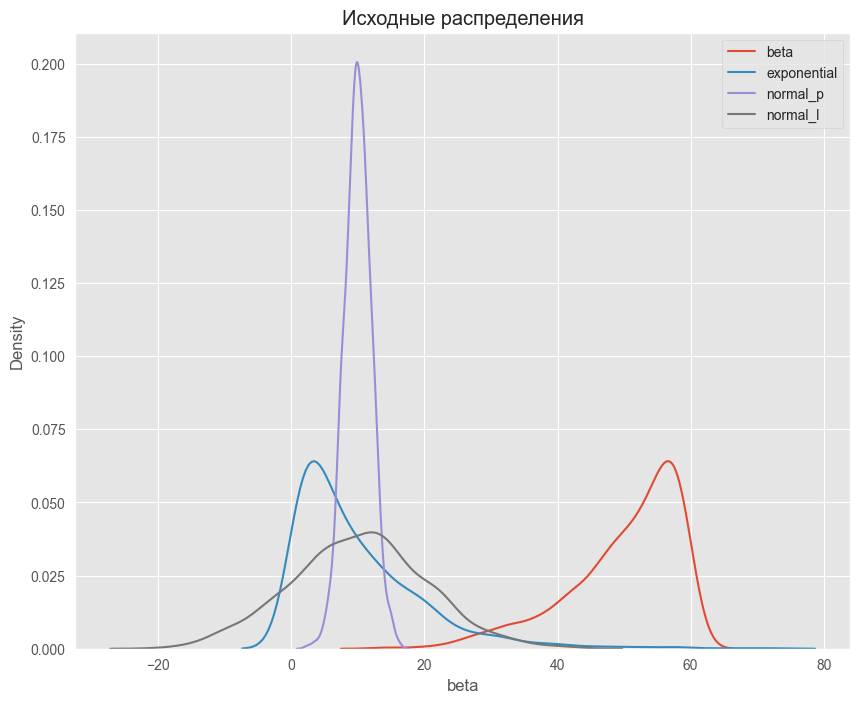

In [229]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(dff['beta'], ax=ax1, label ='beta')
sns.kdeplot(dff['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(dff['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(dff['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

In [230]:
dff.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745
std,8.474545,9.733928,2.013971,10.104004
min,13.854022,0.007617,2.356844,-19.539980
25%,45.793283,2.951421,8.687478,3.566822
50%,52.337504,7.018565,9.983498,10.326331
75%,56.722191,14.022485,11.306914,16.615057
max,59.990640,71.344341,16.214364,42.072915


<AxesSubplot:title={'center':'После нормализации MinMaxScaler'}, xlabel='beta', ylabel='Density'>

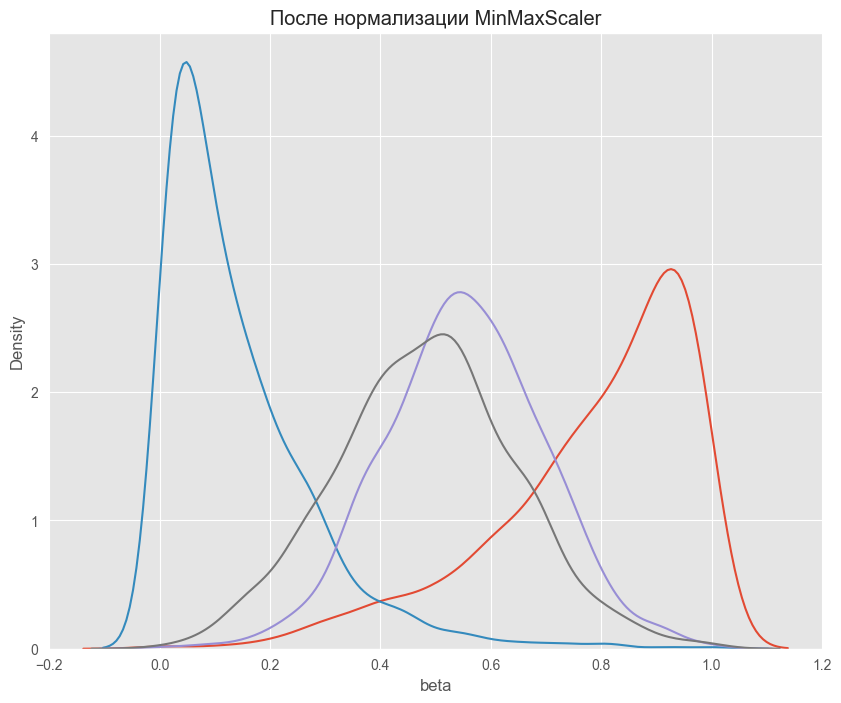

In [231]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# копируем исходный датасет
df_mm = mm_scaler.fit_transform(dff)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)

<AxesSubplot:title={'center':'Распределения после RobustScaler'}, xlabel='beta', ylabel='Density'>

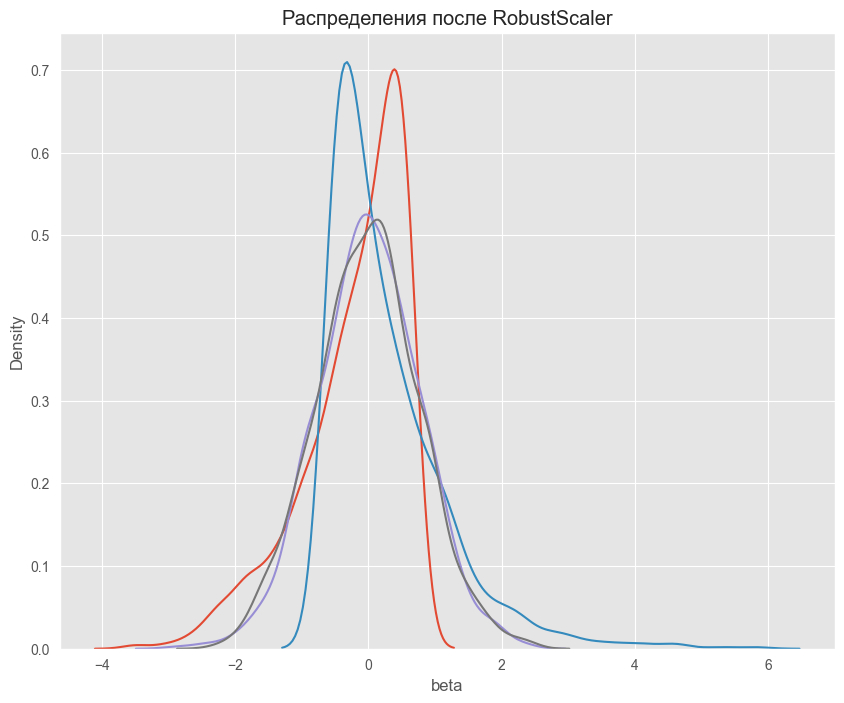

In [232]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# копируем исходный датасет
df_r = r_scaler.fit_transform(dff)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)

<AxesSubplot:title={'center':'Распределения после StandardScaler'}, xlabel='beta', ylabel='Density'>

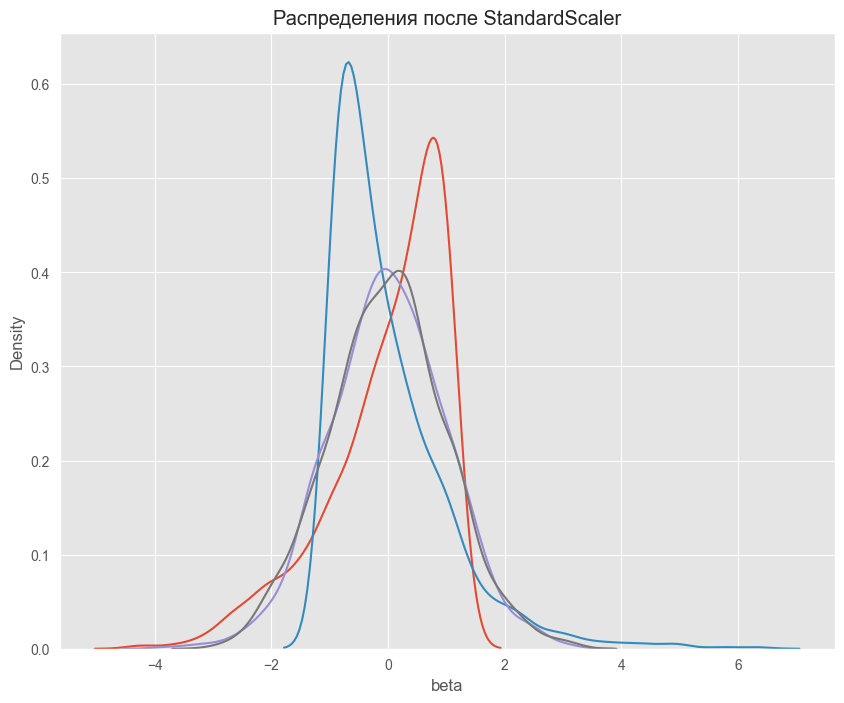

In [233]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# копируем исходный датасет
df_s = s_scaler.fit_transform(dff)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)

In [234]:
df['price']

0         35.363389
1         15.000000
2         14.000000
3         13.000000
4         65.000000
            ...    
129966    28.000000
129967    75.000000
129968    30.000000
129969    32.000000
129970    21.000000
Name: price, Length: 129972, dtype: float64

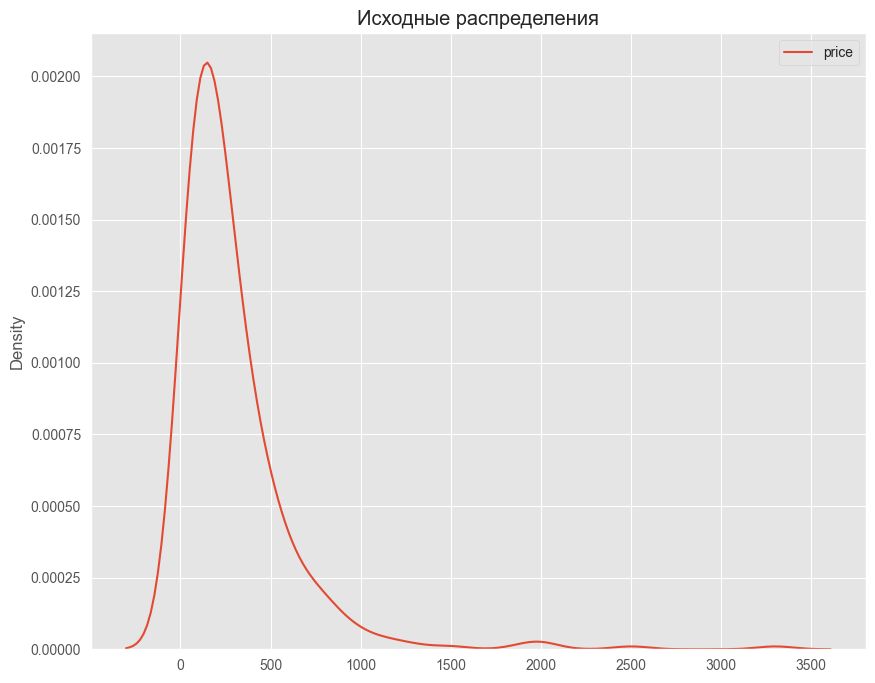

In [236]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['price'].unique(), ax=ax1, label ='price')
plt.legend()

In [261]:
mm_scaler = preprocessing.RobustScaler()

dd = pd.DataFrame(df['price'])
# копируем исходный датасет
df_mm = mm_scaler.fit_transform(dd)

df_mm = pd.DataFrame(df_mm)
#display(df_mm)

s_scaler = preprocessing.StandardScaler()
# копируем исходный датасет
df_s = s_scaler.fit_transform(pd.DataFrame(df['price']))

display(df_s[129968])

# display(df_mm[0].sum())

array([1.00151487])

In [262]:
iris = pd.read_csv('data/iris.zip')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


<AxesSubplot:>

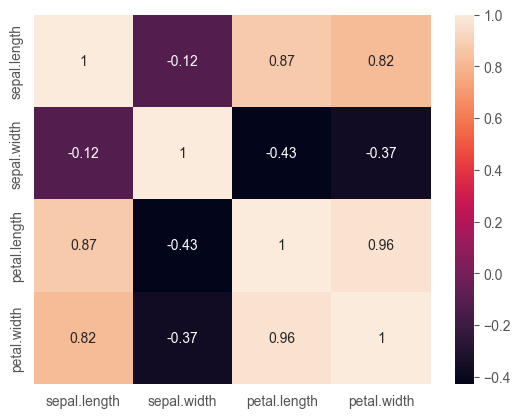

In [263]:
sns.heatmap(iris.corr(), annot=True) # включаем отображение коэффициентов

In [264]:
iris = iris.drop(['petal.width'], axis=1)

In [265]:
iris = iris.drop(['petal.length'], axis=1)

<AxesSubplot:>

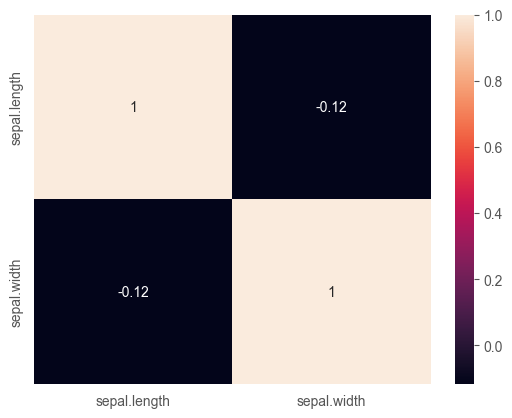

In [266]:
sns.heatmap(iris.corr(), annot=True)

<AxesSubplot:>

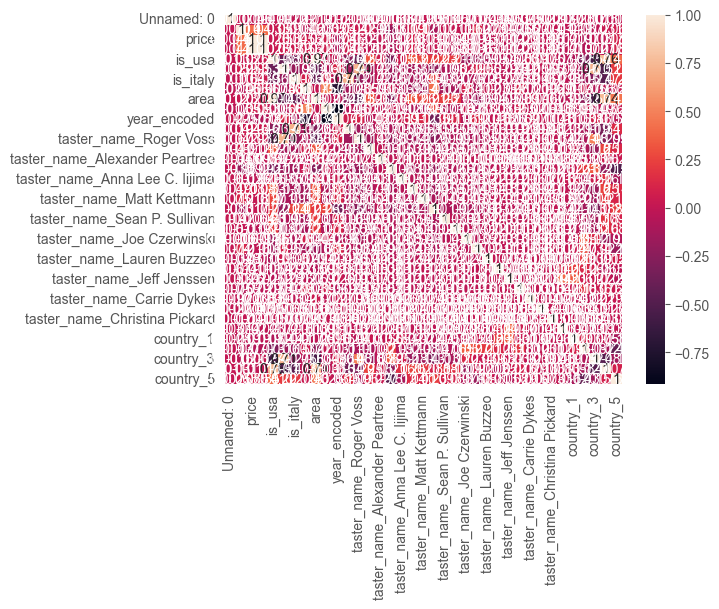

In [267]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

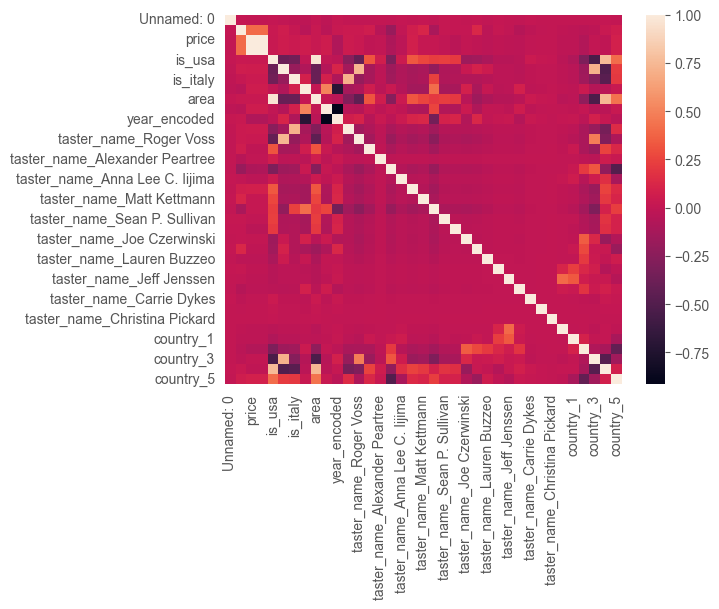

In [268]:
sns.heatmap(df.corr())

<AxesSubplot:>

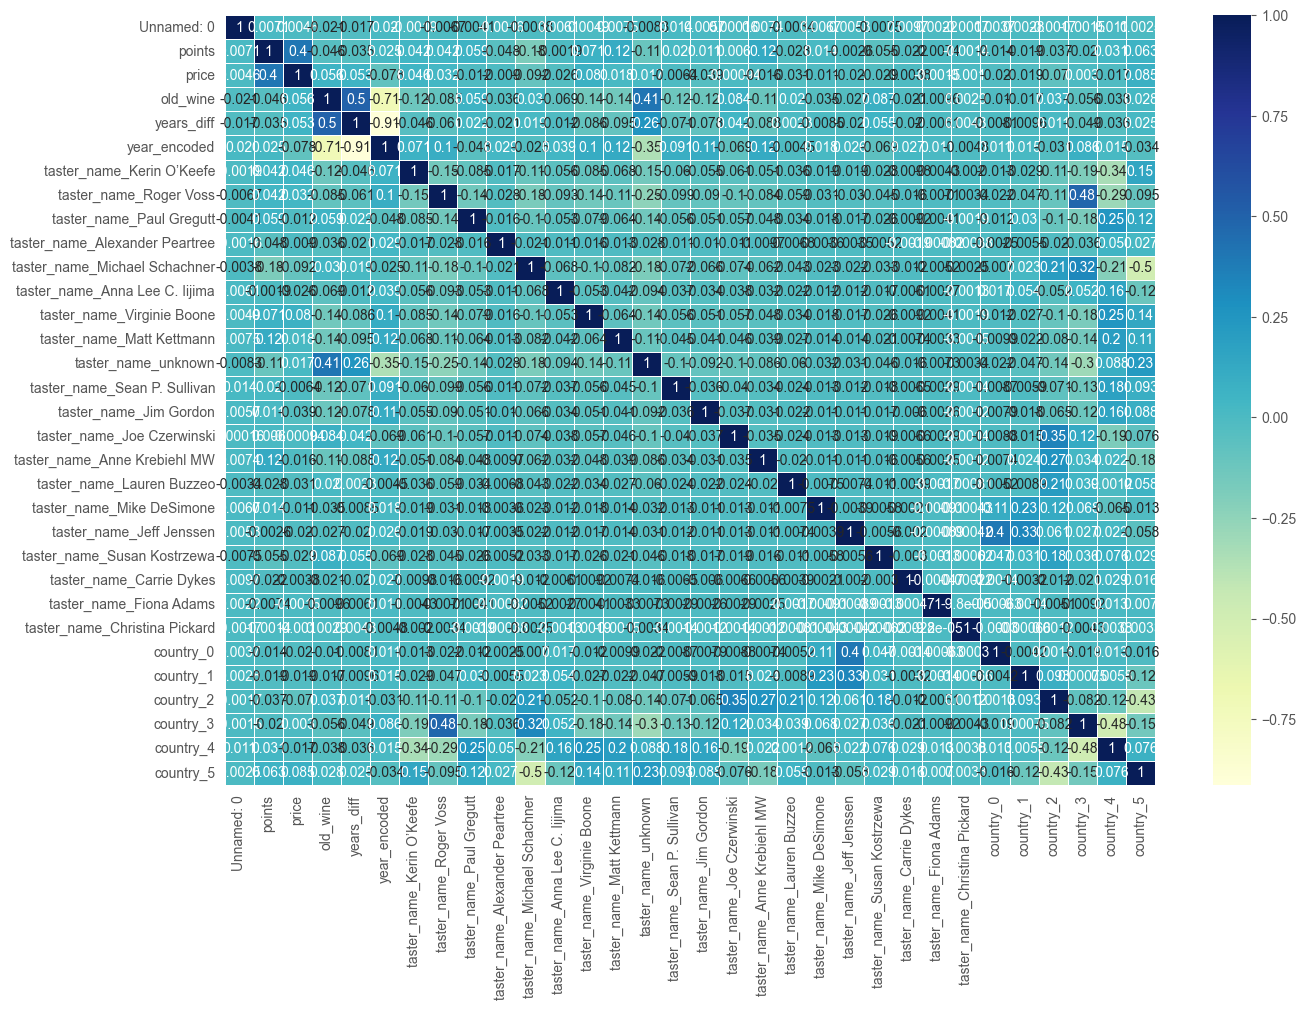

In [272]:
# Построим график корреляции всех величин. Для простоты воспользуемся корреляцией Пирсона.

# работа с визуализацией
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10))
#sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

# Удалим самые сильно скоррелированные пары
data = df.drop(['is_usa', 'is_france', 'is_italy', 'price_round', 'area'], axis=1)

# Проверяем, что сильно скоррелированных признаков не осталось
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax, cmap="YlGnBu")

In [274]:
d = pd.read_csv('data/heart.zip')
d.head()
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [276]:
d['old'] = d['age'].apply(lambda x: 1 if x > 60 else 0)
d.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


In [277]:
d['old'].sum()

79

In [282]:
print(d['trestbps'][300])
print(d['age'][300])
print(d['sex'][300])

144
68
1


In [283]:
d

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0


In [284]:
d.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
old           2
dtype: int64

In [286]:
dummy_encoder = ce.OneHotEncoder(cols=['cp'], use_cat_names=True)
data_bin = dummy_encoder.fit_transform(d['cp'])
d = pd.concat([d, data_bin], axis=1)

dummy_encoder = ce.OneHotEncoder(cols=['restecg'], use_cat_names=True)
data_bin = dummy_encoder.fit_transform(d['restecg'])
d = pd.concat([d, data_bin], axis=1)

dummy_encoder = ce.OneHotEncoder(cols=['slope'], use_cat_names=True)
data_bin = dummy_encoder.fit_transform(d['slope'])
d = pd.concat([d, data_bin], axis=1)

dummy_encoder = ce.OneHotEncoder(cols=['ca'], use_cat_names=True)
data_bin = dummy_encoder.fit_transform(d['ca'])
d = pd.concat([d, data_bin], axis=1)

dummy_encoder = ce.OneHotEncoder(cols=['thal'], use_cat_names=True)
data_bin = dummy_encoder.fit_transform(d['thal'])
d = pd.concat([d, data_bin], axis=1)


In [287]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    int64  
 1   sex          303 non-null    int64  
 2   cp           303 non-null    int64  
 3   trestbps     303 non-null    int64  
 4   chol         303 non-null    int64  
 5   fbs          303 non-null    int64  
 6   restecg      303 non-null    int64  
 7   thalach      303 non-null    int64  
 8   exang        303 non-null    int64  
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    int64  
 11  ca           303 non-null    int64  
 12  thal         303 non-null    int64  
 13  target       303 non-null    int64  
 14  old          303 non-null    int64  
 15  cp_3.0       303 non-null    int64  
 16  cp_2.0       303 non-null    int64  
 17  cp_1.0       303 non-null    int64  
 18  cp_0.0       303 non-null    int64  
 19  restecg_

0.816232


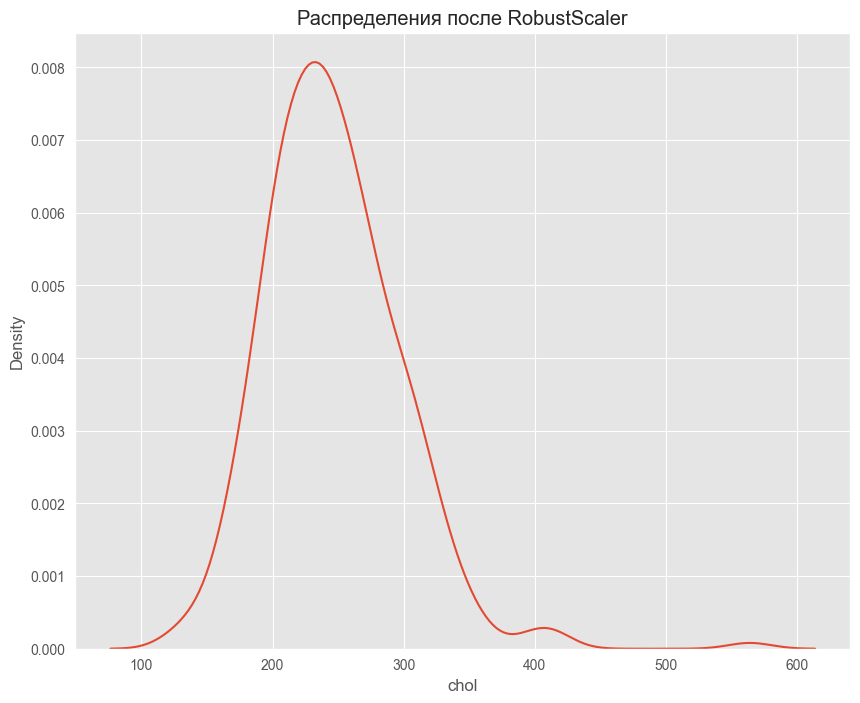

In [293]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

col_names = list(d.columns)

# копируем исходный датасет
df_r = r_scaler.fit_transform(d)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(d['chol'], ax=ax1)

print(round(df_r['chol'].std(), 6))

In [291]:
df_r

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_1.0,ca_0.0,ca_2.0,ca_1.0,ca_3.0,ca_4.0,thal_1.0,thal_2.0,thal_3.0,thal_0.0
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,0,0,1,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,0,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,1,0,0,0,0,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,1,0,0,0,0,0,1,0,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,1,1,0,0,0,0,0,0,1,0
299,45,1,3,110,264,0,1,132,0,1.2,...,1,1,0,0,0,0,0,0,1,0
300,68,1,0,144,193,1,1,141,0,3.4,...,1,0,1,0,0,0,0,0,1,0
301,57,1,0,130,131,0,1,115,1,1.2,...,1,0,0,1,0,0,0,0,1,0


<AxesSubplot:>

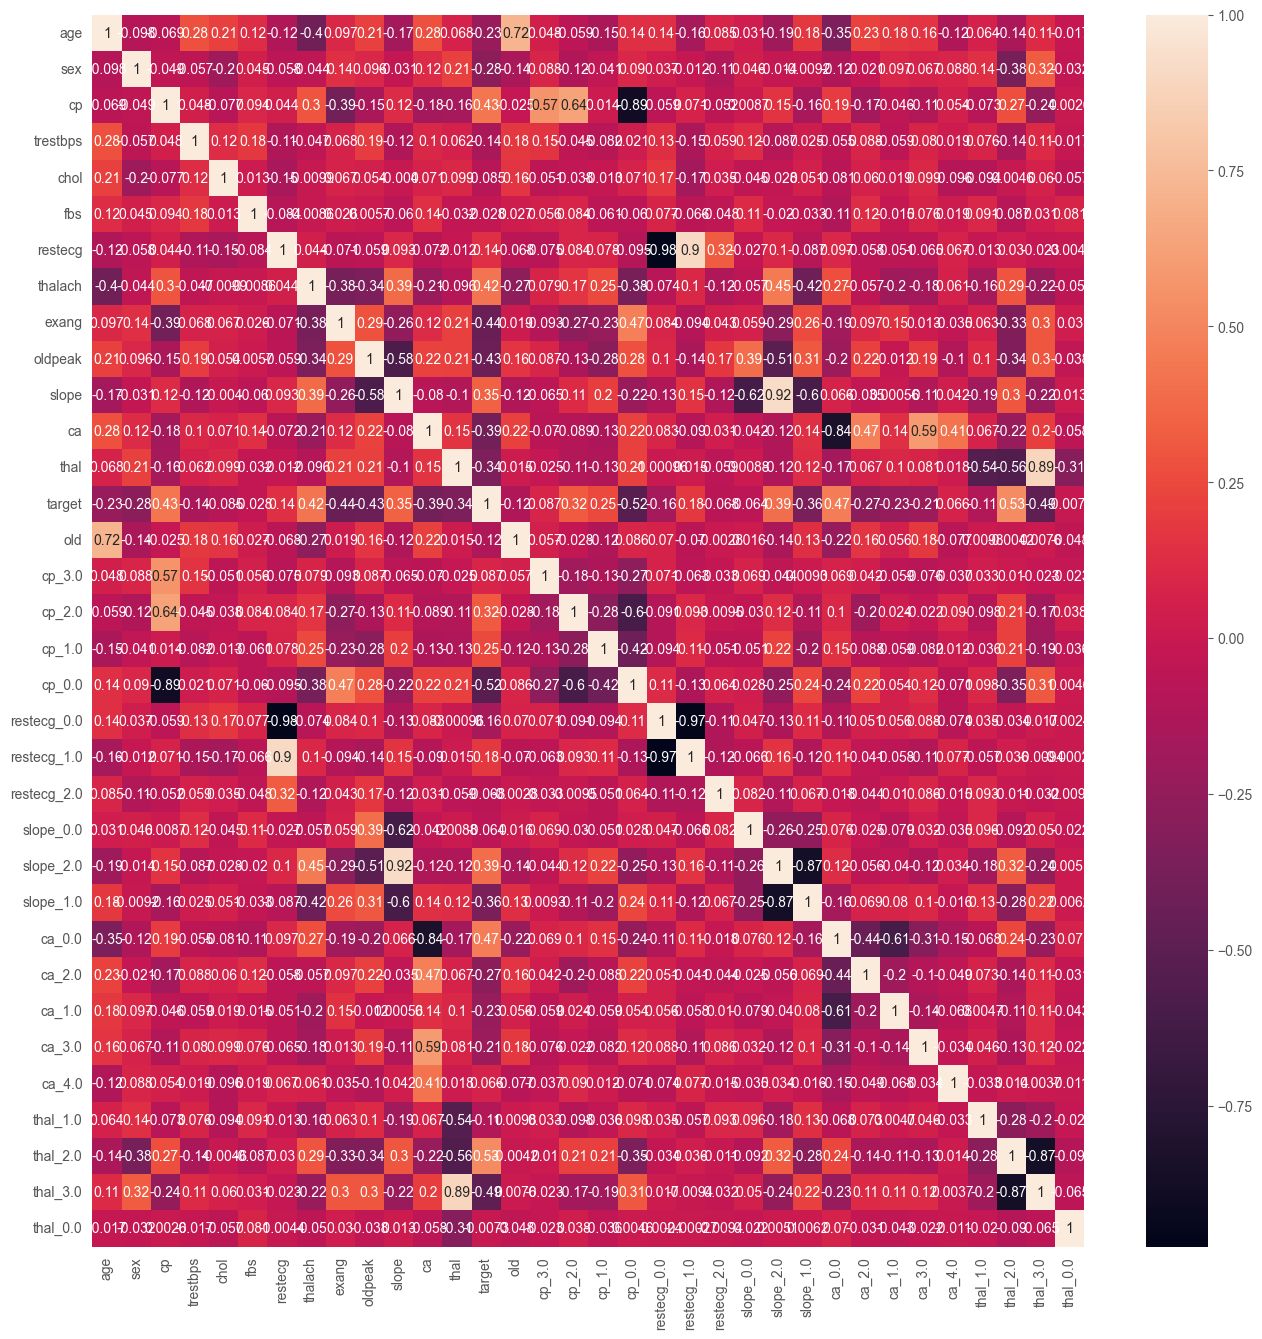

In [300]:
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(d.corr(), annot=True)

In [295]:
d.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_1.0,ca_0.0,ca_2.0,ca_1.0,ca_3.0,ca_4.0,thal_1.0,thal_2.0,thal_3.0,thal_0.0
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,...,0.177201,-0.350844,0.226491,0.179284,0.162243,-0.122378,0.063758,-0.135891,0.110752,-0.016779
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,...,-0.009157,-0.122854,-0.020571,0.096673,0.066758,0.088212,0.141135,-0.376365,0.321559,-0.032093
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,...,-0.156633,0.193087,-0.171632,-0.045686,-0.107590,0.054436,-0.073254,0.266947,-0.237760,0.002611
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,...,0.025207,-0.055011,0.088386,-0.059485,0.080109,0.019059,0.076369,-0.140712,0.109573,-0.016870
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,...,0.051177,-0.080600,0.059887,0.018775,0.098568,-0.095785,-0.093560,-0.004591,0.059621,-0.057127
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,...,-0.033360,-0.112548,0.122080,-0.014774,0.075867,0.018754,0.091351,-0.086774,0.030953,0.080568
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,...,-0.087349,0.096607,-0.058198,-0.050897,-0.064842,0.067098,-0.013429,0.029597,-0.023012,-0.004356
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,...,-0.419627,0.273136,-0.056905,-0.195502,-0.175506,0.060911,-0.159748,0.294801,-0.215417,-0.050429
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,...,0.257687,-0.187734,0.097399,0.150206,0.013188,-0.035001,0.063073,-0.328539,0.300223,0.030113
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,...,0.310986,-0.204803,0.218319,-0.011613,0.189296,-0.104998,0.104635,-0.339086,0.302145,-0.037946
